In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.preprocessing import FunctionTransformer
from numpy.random import RandomState

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"


%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [2]:
random_state = RandomState(seed=42)

x, _ = make_circles(n_samples=100, factor=0.5, noise=0.05, random_state=random_state)
x = x + 0.5

[Text(0.5, 1.0, 'Raw Data')]

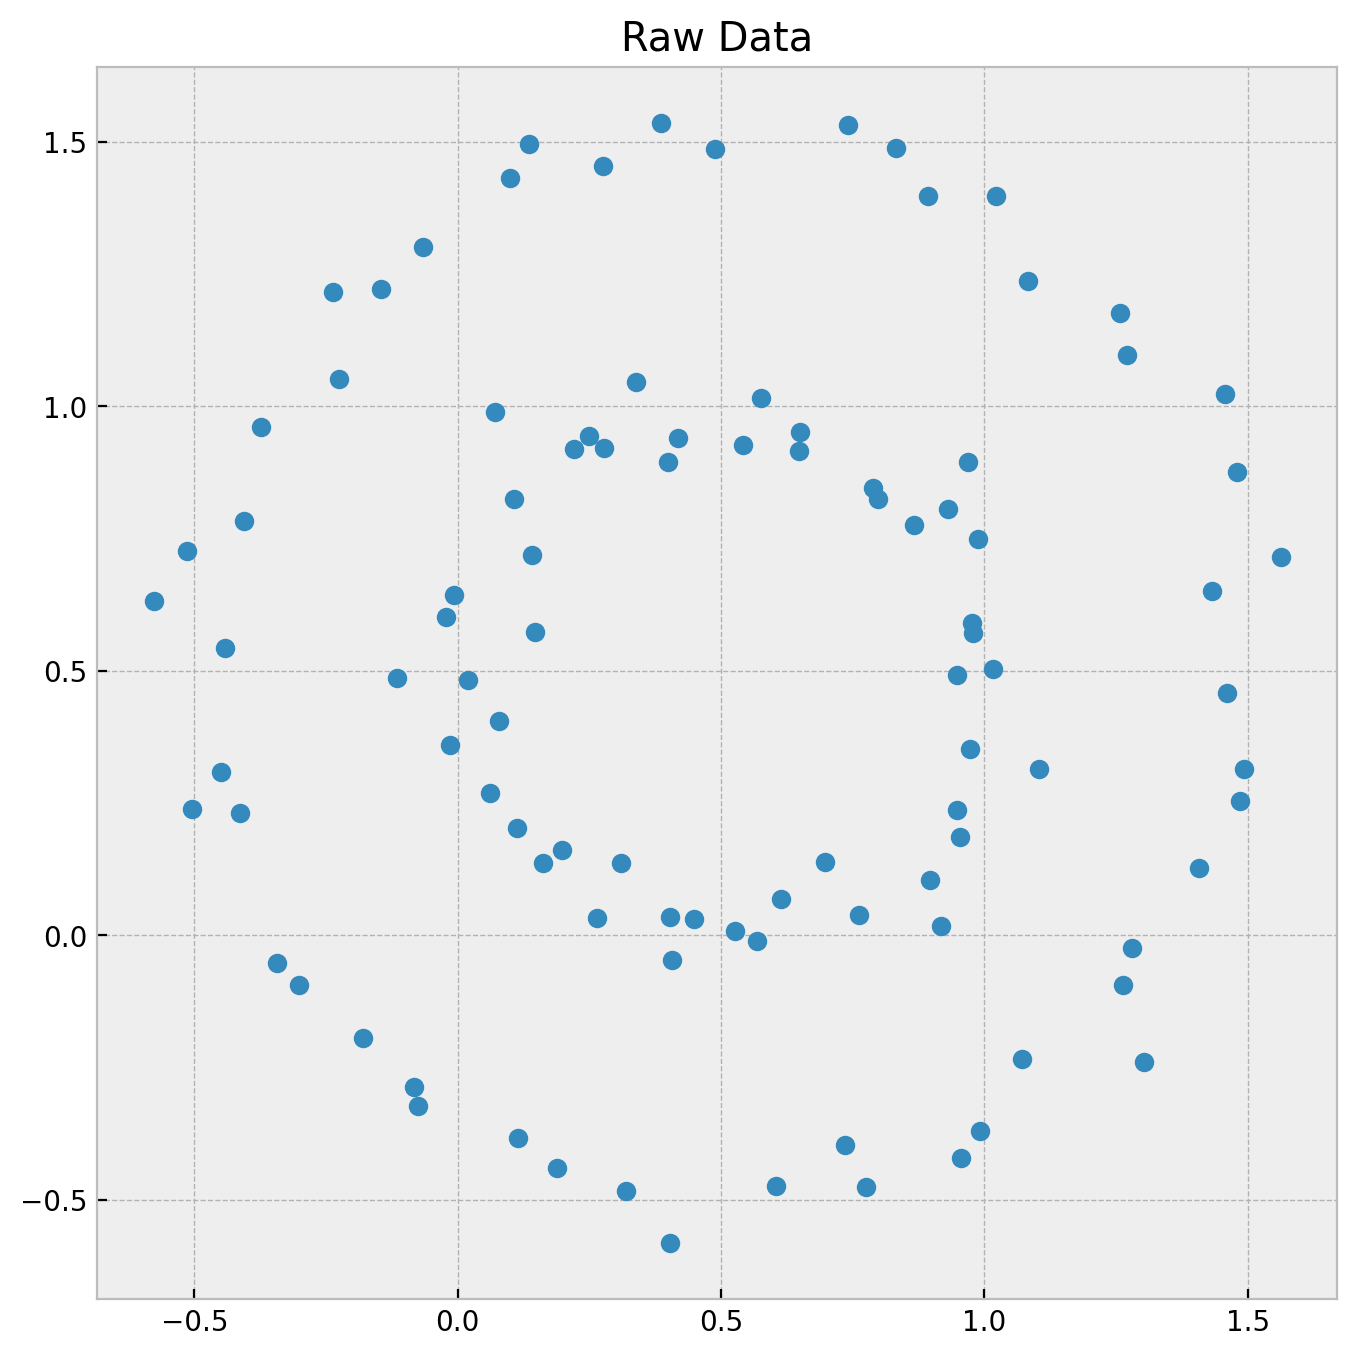

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x[:, 0], x[:, 1], "o", c="C0")
ax.set(
    title="Raw Data",
)


[Text(0.5, 1.0, 'Transformed Data (projected onto unit circle)')]

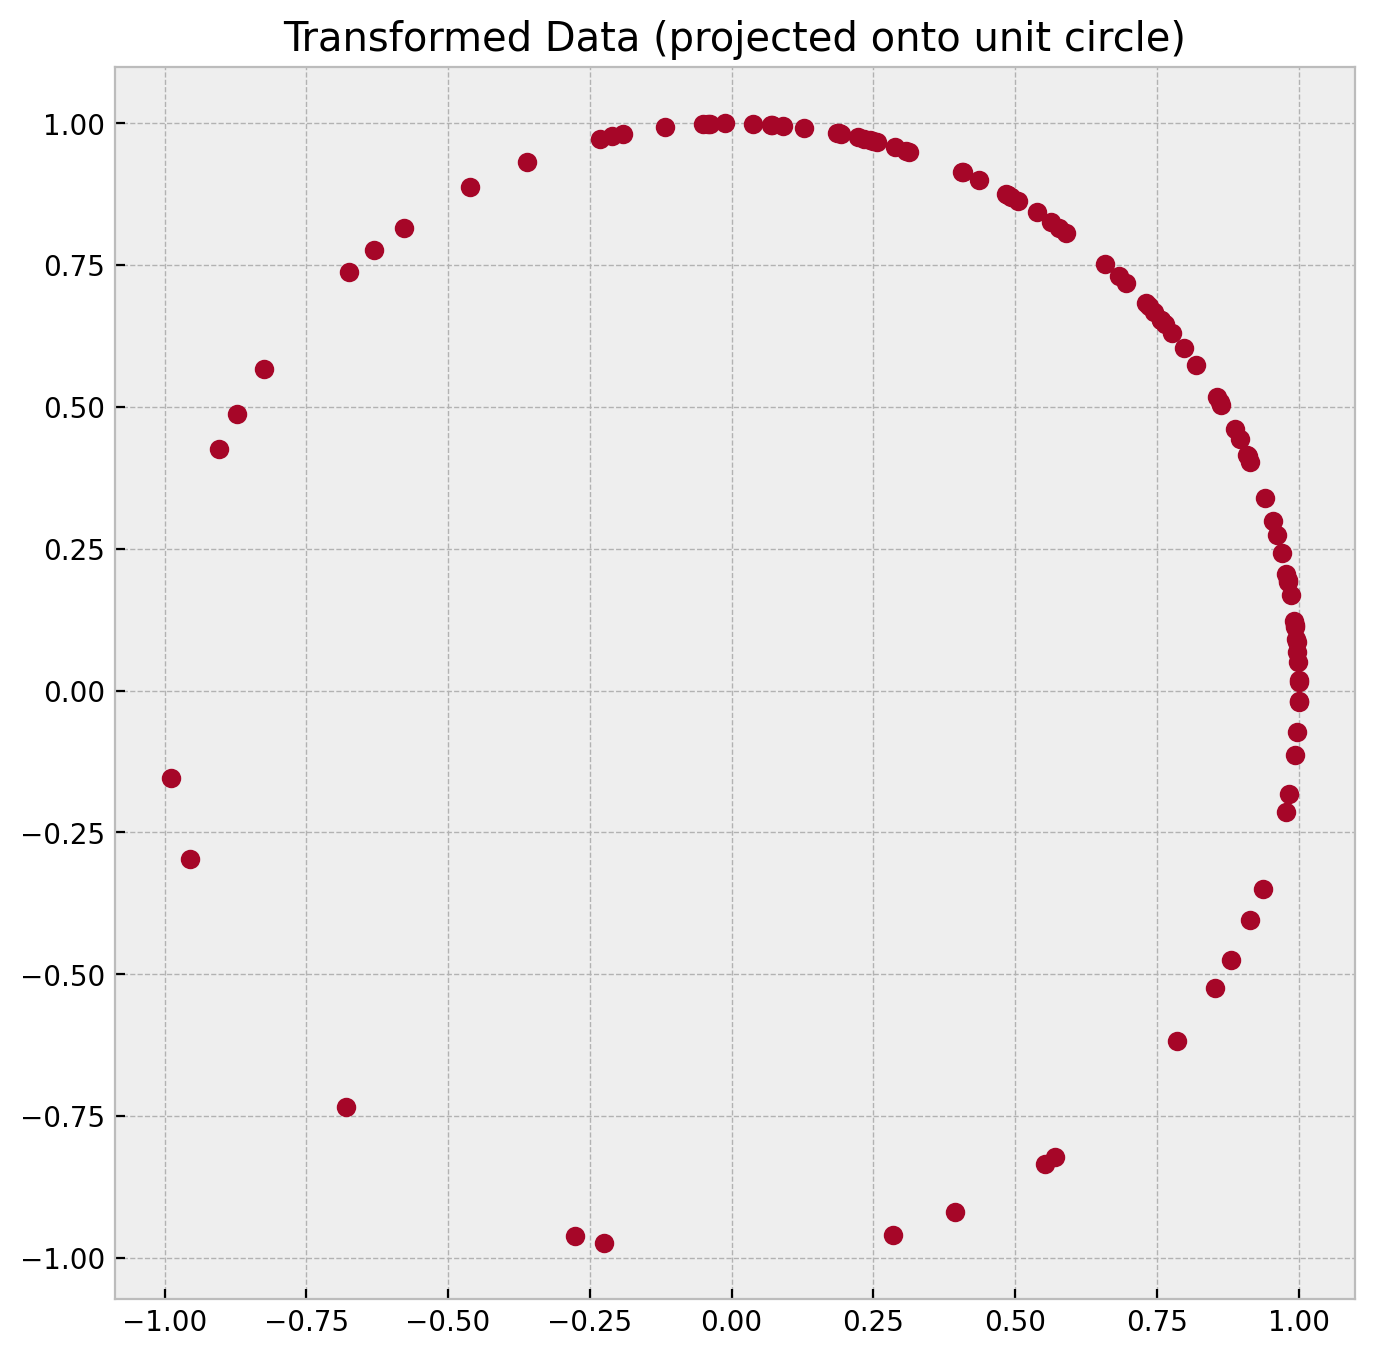

In [4]:
circle_transformer = FunctionTransformer(
    func=lambda x: x / np.linalg.norm(x, axis=1)[..., None]
)
x_circle = circle_transformer.fit_transform(x)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_circle[:, 0], x_circle[:, 1], "o", c="C1")
ax.set(
    title="Transformed Data (projected onto unit circle)",
)


In [12]:
n = 6

z = np.array(
    [
        [make_circles(n_samples=(60, 60), random_state=random_state)[0] + i * 0.8]
        for i in range(n)
    ]
)

z.shape

(6, 1, 120, 2)

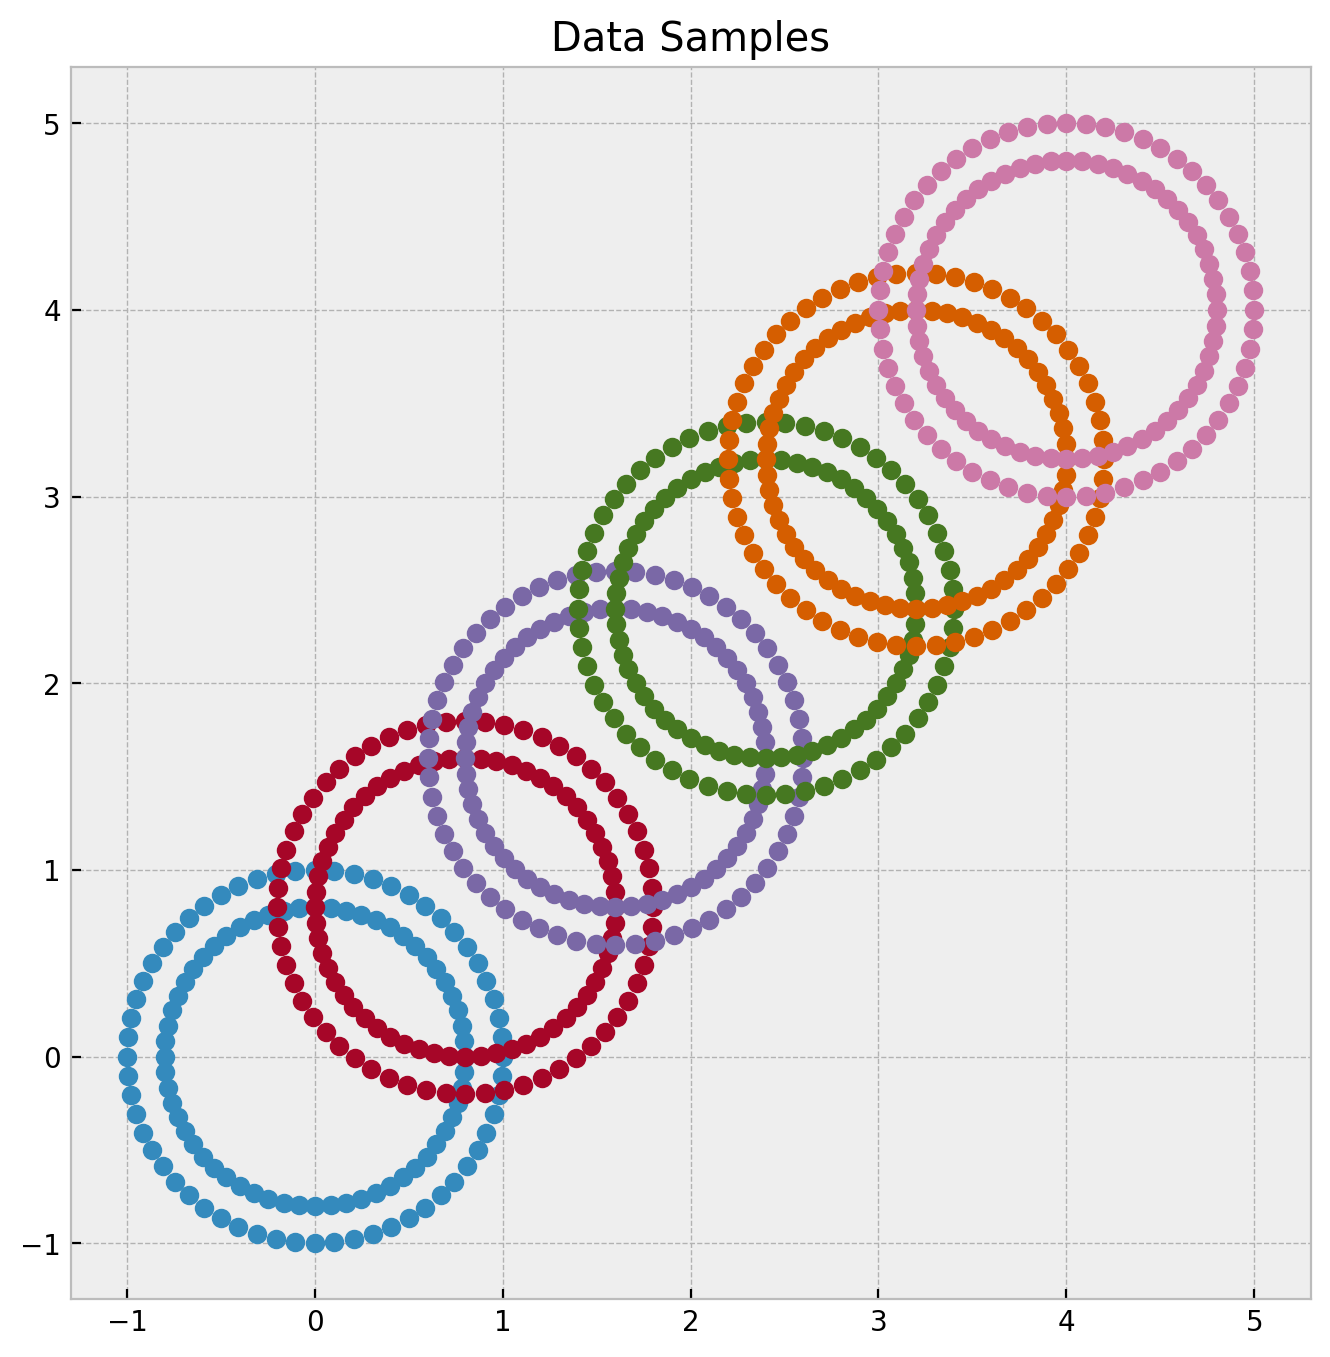

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))

for i in range(n):
    ax.plot(z[i, :, :, 0], z[i, :, :, 1], "o", c=f"C{i}")
    ax.set(
        title="Data Samples",
    )


In [14]:
try:
    circle_transformer.transform(z)
except ValueError as e:
    print(f"ValueError: {e}")

ValueError: operands could not be broadcast together with shapes (6,1,120,2) (6,120,2,1) 


In [15]:
vectorized_circle_transformer = np.vectorize(
    pyfunc=circle_transformer.transform,
    excluded=[2, 3],
    signature="(m, n) -> (m, n)",
)

z_circle = vectorized_circle_transformer(z)

z.shape


(6, 1, 120, 2)

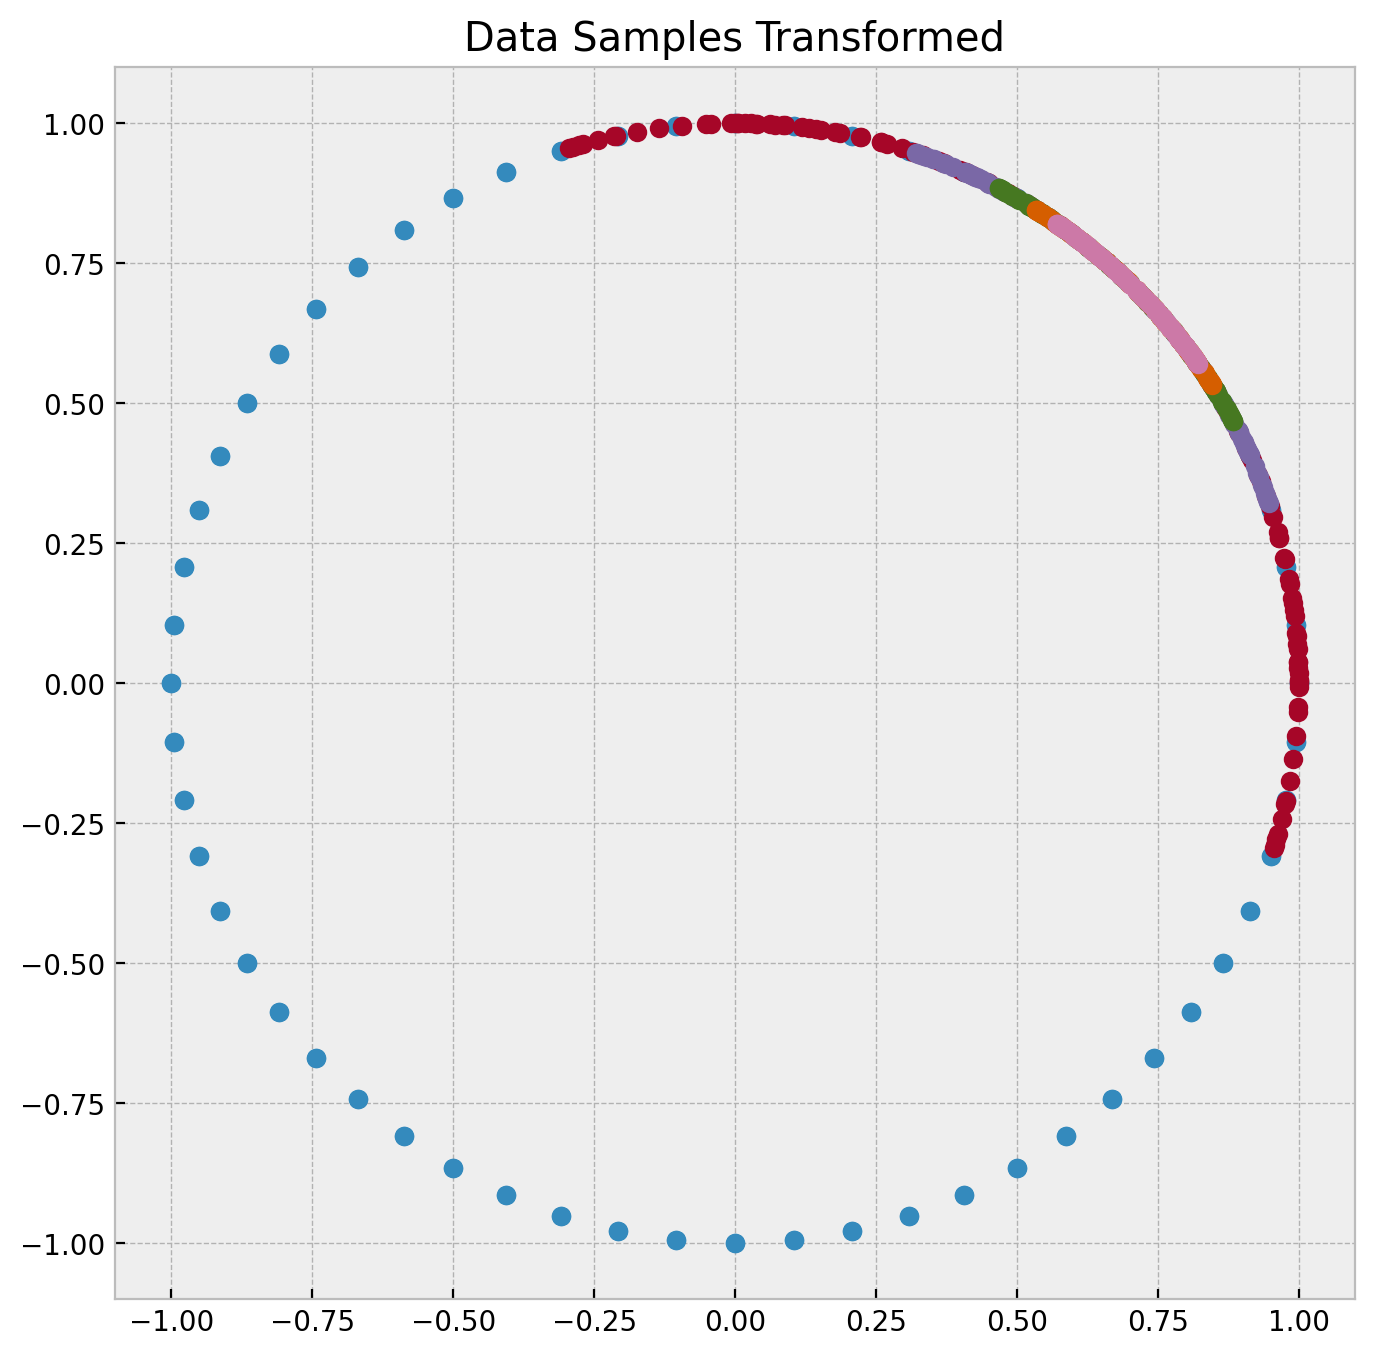

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))

for i in range(n):
    ax.plot(z_circle[i, :, :, 0], z_circle[i, :, :, 1], "o", c=f"C{i}")
    ax.set(
        title="Data Samples Transformed",
    )
